In [25]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
import math
from math import sqrt
import matplotlib.pyplot as plt

# label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

# scaler
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn import tree

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# cross validation
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

from pprint import pprint

from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV

In [12]:
# import data
complete = pd.read_csv('CompleteResponses.csv')
complete.head()

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0


In [13]:
# rename columns
complete = complete.rename({'elevel': 'education',
                            'credit': 'availCredit',
                            'zipcode': 'region',
                            'brand': 'brandPref'}, axis='columns')
complete.head()

,salary,age,education,car,region,availCredit,brandPref
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0


In [14]:
# find and remove any duplicate rows
# check for duplicate rows
complete.duplicated().sum()
# create list of duplicate rows
duplicateRowsDF = complete[complete.duplicated()]
print(duplicateRowsDF)
# drop duplicates
complete = complete.drop_duplicates()
complete.duplicated().sum()

Empty DataFrame
Columns: [salary, age, education, car, region, availCredit, brandPref]
Index: []


0

In [15]:
# search for missing values
complete.isnull().values.any()
# count missing values for each feature
complete.isnull().sum()

salary         0
age            0
education      0
car            0
region         0
availCredit    0
brandPref      0
dtype: int64

In [16]:
# get to know the data
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 0 to 9897
Data columns (total 7 columns):
salary         9898 non-null float64
age            9898 non-null int64
education      9898 non-null int64
car            9898 non-null int64
region         9898 non-null int64
availCredit    9898 non-null float64
brandPref      9898 non-null int64
dtypes: float64(2), int64(5)
memory usage: 618.6 KB


In [17]:
complete.describe()

,salary,age,education,car,region,availCredit,brandPref
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [18]:
# look at correlation coefficient matrix
corrMat = complete.corr()
s = corrMat.unstack()
so = s.sort_values(kind="quicksort")
pd.set_option('display.max_rows', 200)
s = corrMat.unstack()
so = s.sort_values(ascending=False)
so

brandPref    brandPref      1.000000
availCredit  availCredit    1.000000
age          age            1.000000
education    education      1.000000
region       region         1.000000
car          car            1.000000
salary       salary         1.000000
             brandPref      0.206490
brandPref    salary         0.206490
region       education      0.018095
education    region         0.018095
brandPref    age            0.013713
age          brandPref      0.013713
             car            0.010246
car          age            0.010246
age          salary         0.007979
salary       age            0.007979
car          brandPref      0.005923
brandPref    car            0.005923
availCredit  brandPref      0.005688
brandPref    availCredit    0.005688
region       availCredit    0.004962
availCredit  region         0.004962
brandPref    region         0.004665
region       brandPref      0.004665
             age            0.003681
age          region         0.003681
e

In [19]:
# make dummy variables for car, region
complete_onehot = complete.copy()
complete_onehot = pd.get_dummies(complete, columns=['car','region'])
complete_onehot.head()

,salary,age,education,availCredit,brandPref,car_1,car_2,car_3,car_4,car_5,...,car_20,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,119806.54480,45,0,442037.71130,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,106880.47840,63,1,45007.17883,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,78020.75094,23,0,48795.32279,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,63689.93635,51,3,40888.87736,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,50873.61880,20,3,352951.49770,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##############################################

MODELS

In [22]:
# define features
X = complete_onehot.drop(columns=['brandPref'])
print('Summary of feature sample')
X.head()

Summary of feature sample


,salary,age,education,availCredit,car_1,car_2,car_3,car_4,car_5,car_6,...,car_20,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,119806.54480,45,0,442037.71130,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,106880.47840,63,1,45007.17883,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,78020.75094,23,0,48795.32279,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,63689.93635,51,3,40888.87736,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,50873.61880,20,3,352951.49770,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# define dependent variable
y = complete_onehot['brandPref']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: brandPref, dtype: int64

In [26]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

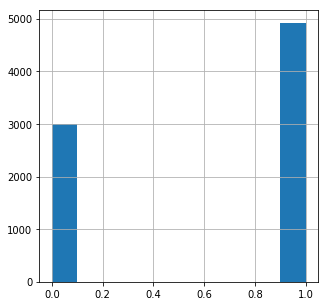

In [27]:
y_train.hist(figsize = (5,5))

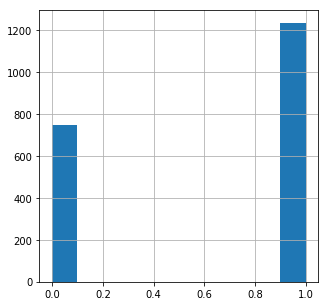

In [28]:
y_test.hist(figsize = (5,5))

In [29]:
# apply scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
model_list = []
accept1 = "dtc"
accept2 = "rf"
accept3 = "gbm"

In [33]:
# set up model running and results printout
def print_model_results(model,name,initial):
    print()
    print('[' + name + ']')
    print()
    print('Accuracy of classifier on training set: {:.2f}'
         .format(model.score(X_train, y_train)))
    print('Accuracy of classifier on test set: {:.2f}'
         .format(model.score(X_test, y_test)))
    model_pred = model.predict(X_test)
    print()
    print("-----------------------------------------------------------")
    print()
    print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
    print()
    print("-----------------------------------------------------------")
    print()
    print(classification_report(y_test, model_pred))
    model_list.append([name, model.score(X_test, y_test)])
    if initial == accept1 or initial == accept2 or initial == accept3:
        var_importance = (pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
        plt.title("Variable Importance to Loan Default Status")
        plt.xlabel("Correlation Score")
        plt.show()
    else:
        None
    print("-----------------------------------------------------------")
    print()
    print("[Tuning Parameters]")
    print()
    print(model.get_params())


[Random Forest]

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.84

-----------------------------------------------------------

Predicted    0     1
Actual              
0          603   144
1          175  1058

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       747
           1       0.88      0.86      0.87      1233

   micro avg       0.84      0.84      0.84      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.84      0.84      0.84      1980



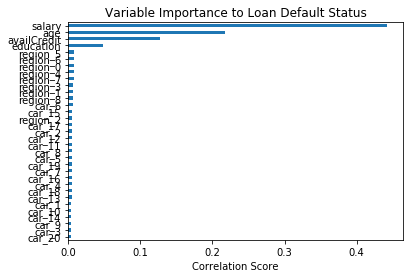

-----------------------------------------------------------

[Tuning Parameters]

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [34]:
# run Random Forest
rf = RandomForestClassifier()
rf_name = "Random Forest"
rf_init = "rf"
rf.fit(X_train, y_train)
print_model_results(rf,rf_name,rf_init)


[Decision Tree]

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.89

-----------------------------------------------------------

Predicted    0     1
Actual              
0          622   125
1           93  1140

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       747
           1       0.90      0.92      0.91      1233

   micro avg       0.89      0.89      0.89      1980
   macro avg       0.89      0.88      0.88      1980
weighted avg       0.89      0.89      0.89      1980



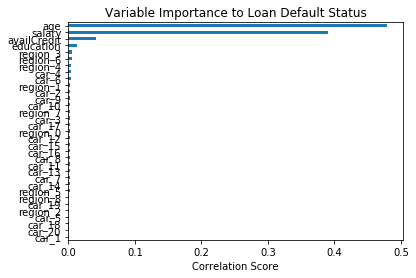

-----------------------------------------------------------

[Tuning Parameters]

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [35]:
# run Decision Tree
dtc = DecisionTreeClassifier()
dtc_name = "Decision Tree"
dtc_init = "dtc"
dtc.fit(X_train, y_train)
print_model_results(dtc,dtc_name,dtc_init)


[Gradient Boosting]

Accuracy of classifier on training set: 0.93
Accuracy of classifier on test set: 0.92

-----------------------------------------------------------

Predicted    0     1
Actual              
0          678    69
1           97  1136

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       747
           1       0.94      0.92      0.93      1233

   micro avg       0.92      0.92      0.92      1980
   macro avg       0.91      0.91      0.91      1980
weighted avg       0.92      0.92      0.92      1980



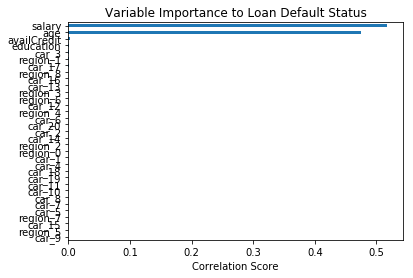

-----------------------------------------------------------

[Tuning Parameters]

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [36]:
# run Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm_name = "Gradient Boosting"
gbm_init = "gbm"
gbm.fit(X_train, y_train)
print_model_results(gbm,gbm_name,gbm_init)

In [37]:
# run Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda_name = "Linear Discriminant Analysis"
lda_init = "lda"
lda.fit(X_train, y_train)
print_model_results(lda,lda_name,lda_init)


[Linear Discriminant Analysis]

Accuracy of classifier on training set: 0.53
Accuracy of classifier on test set: 0.54

-----------------------------------------------------------

Predicted    0    1
Actual             
0           91  656
1          256  977

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.26      0.12      0.17       747
           1       0.60      0.79      0.68      1233

   micro avg       0.54      0.54      0.54      1980
   macro avg       0.43      0.46      0.42      1980
weighted avg       0.47      0.54      0.49      1980

-----------------------------------------------------------

[Tuning Parameters]

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [38]:
# run KNN
knn = KNeighborsClassifier()
knn_name = "K-NN"
knn_init = "knn"
knn.fit(X_train, y_train)
print_model_results(knn,knn_name,knn_init)


[K-NN]

Accuracy of classifier on training set: 0.78
Accuracy of classifier on test set: 0.61

-----------------------------------------------------------

Predicted    0    1
Actual             
0          335  412
1          362  871

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.48      0.45      0.46       747
           1       0.68      0.71      0.69      1233

   micro avg       0.61      0.61      0.61      1980
   macro avg       0.58      0.58      0.58      1980
weighted avg       0.60      0.61      0.61      1980

-----------------------------------------------------------

[Tuning Parameters]

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [39]:
# run Gaussian Naive Bayes
gnb = GaussianNB()
gnb_name = "Gaussian Naive Bayes"
gnb_init = "gnb"
gnb.fit(X_train, y_train)
print_model_results(gnb,gnb_name,gnb_init)


[Gaussian Naive Bayes]

Accuracy of classifier on training set: 0.66
Accuracy of classifier on test set: 0.65

-----------------------------------------------------------

Predicted    0     1
Actual              
0          274   473
1          225  1008

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.55      0.37      0.44       747
           1       0.68      0.82      0.74      1233

   micro avg       0.65      0.65      0.65      1980
   macro avg       0.61      0.59      0.59      1980
weighted avg       0.63      0.65      0.63      1980

-----------------------------------------------------------

[Tuning Parameters]

{'priors': None, 'var_smoothing': 1e-09}


In [40]:
# run SVM
svm = SVC()
svm_name = "SVM"
svm_init = "svm"
svm.fit(X_train, y_train)
print_model_results(svm,svm_name,svm_init)


[SVM]

Accuracy of classifier on training set: 0.62
Accuracy of classifier on test set: 0.62

-----------------------------------------------------------

Predicted     1
Actual         
0           747
1          1233

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       747
           1       0.62      1.00      0.77      1233

   micro avg       0.62      0.62      0.62      1980
   macro avg       0.31      0.50      0.38      1980
weighted avg       0.39      0.62      0.48      1980



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-----------------------------------------------------------

[Tuning Parameters]

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [41]:
# run Logistic Regression Classification
logreg = LogisticRegression(penalty='l1')
logreg_name = "Logistic Regression Classification"
logreg_init = "logreg"
logreg.fit(X_train, y_train)
print_model_results(logreg,logreg_name,logreg_init)
pprint(logreg.get_params())


[Logistic Regression Classification]

Accuracy of classifier on training set: 0.53
Accuracy of classifier on test set: 0.54

-----------------------------------------------------------

Predicted    0    1
Actual             
0           79  668
1          243  990

-----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.25      0.11      0.15       747
           1       0.60      0.80      0.68      1233

   micro avg       0.54      0.54      0.54      1980
   macro avg       0.42      0.45      0.42      1980
weighted avg       0.46      0.54      0.48      1980

-----------------------------------------------------------

[Tuning Parameters]

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C'

In [42]:
# see models compared by accuracy
comparison_cols = ['Model', 'Accuracy']
models_compared = pd.DataFrame(model_list, columns=comparison_cols)
models_compared = models_compared.sort_values(by=['Accuracy'], ascending = [False])
models_compared

,Model,Accuracy
2,Gradient Boosting,0.916162
1,Decision Tree,0.889899
0,Random Forest,0.838889
5,Gaussian Naive Bayes,0.647475
6,SVM,0.622727
4,K-NN,0.609091
7,Logistic Regression Classification,0.539899
3,Linear Discriminant Analysis,0.539394


############################################

REPEAT PREPROCESSING ON NEW DATA

In [50]:
# import data
new = pd.read_csv('SurveyIncomplete.csv')
new.head()

,salary,age,elevel,car,zipcode,credit,brand
0,150000.00000,76,1,3,3,377980.1016,0
1,82523.83897,51,1,8,3,141657.6066,0
2,115646.63620,34,0,10,2,360980.3585,0
3,141443.39330,22,3,18,2,282736.3191,0
4,149211.27030,56,0,5,3,215667.2896,0


In [51]:
# rename columns
new = new.rename({'elevel': 'education',
                  'credit': 'availCredit',
                  'zipcode': 'region',
                  'brand': 'brandPref'}, axis='columns')
new.head()

,salary,age,education,car,region,availCredit,brandPref
0,150000.00000,76,1,3,3,377980.1016,0
1,82523.83897,51,1,8,3,141657.6066,0
2,115646.63620,34,0,10,2,360980.3585,0
3,141443.39330,22,3,18,2,282736.3191,0
4,149211.27030,56,0,5,3,215667.2896,0


In [52]:
# make dummy variables for car, region
new_onehot = new.copy()
new_onehot = pd.get_dummies(new, columns=['car','region'])
new_onehot.head()

,salary,age,education,availCredit,brandPref,car_1,car_2,car_3,car_4,car_5,...,car_20,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,150000.00000,76,1,377980.1016,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,82523.83897,51,1,141657.6066,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,115646.63620,34,0,360980.3585,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,141443.39330,22,3,282736.3191,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,149211.27030,56,0,215667.2896,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


##############################################

USE CHOSEN MODEL TO PREDICT VOLUME OF NEW PRODUCTS

In [54]:
# define features
X_new = new_onehot.drop(columns=['brandPref'])
print('Summary of feature sample')
X_new.head()

Summary of feature sample


,salary,age,education,availCredit,car_1,car_2,car_3,car_4,car_5,car_6,...,car_20,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,150000.00000,76,1,377980.1016,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,82523.83897,51,1,141657.6066,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,115646.63620,34,0,360980.3585,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,141443.39330,22,3,282736.3191,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,149211.27030,56,0,215667.2896,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# apply scaling
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_new)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [57]:
# use random forest model to make brand predictions for incomplete surveys
predictions = gbm.predict(X_new)
print(predictions)

[1 0 1 ... 0 0 0]


In [59]:
# input brand predictions
new['brandPref'] = predictions
new.head()

,salary,age,education,car,region,availCredit,brandPref
0,150000.00000,76,1,3,3,377980.1016,1
1,82523.83897,51,1,8,3,141657.6066,0
2,115646.63620,34,0,10,2,360980.3585,1
3,141443.39330,22,3,18,2,282736.3191,1
4,149211.27030,56,0,5,3,215667.2896,1


In [60]:
# export predictions to csv
new.to_csv('BrandPredictions.csv')